# Pokemon Data Visualization and Analysis 

This project uses seaborn, pandas, and matplotlib to analyze "The Complete Pokemon Dataset" on more than 800 Pokemon up to the current (7th) generation. The link to the dataset can be found here: https://www.kaggle.com/rounakbanik/pokemon







***

### Import statements

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display_html

# This is a function to display pandas dataframe side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

----------

### Read Data with Pandas

In [84]:
pkmndf = pd.read_csv('Pokemon.csv')

### Viewing the Columns

In [5]:
pkmndf.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

***

The ability column is not very helpful because it only contains a few abilities for each Pokemon, when the Pokemon could actually have quite a number of abilities aquired. Because of this, I am going to drop this column.

----------

In [94]:
# Drop
pkmndf.drop('abilities', axis = 1, inplace = True)

# Add one to the index, so that the index is the Pokedex Number
pkmndf.index +=1

#### Note that the Index of Rows is now the Pokedex Number of the Pokemon

***

# Stats

By making a scatterplot, we can clearly see the values of the stats of various Pokemon

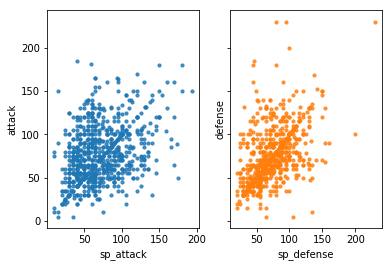

In [95]:
# Figure settings
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# Plot Special Attack vs Attack
sns.regplot(x="sp_attack", y="attack", data=pkmndf, fit_reg = False, scatter_kws={"s": 10}, ax=ax1);

# Plot Special Attack vs Attack
sns.regplot(x="sp_defense", y="defense", data=pkmndf, fit_reg = False, scatter_kws={"s": 10}, ax=ax2);

From the above plots we can see... Oh wow one Pokemon has really high defense stats. Let's find out which Pokemon does the best at level 1. Specifically, we can find that out by finding the highest attack, special attack, overall attack, and highest defense, special defense, and overall defense. 

***

## Top 10 Pokemon for Each Stat


#### Base Individual Stats

Here, we are trying to find the top 10 of each category, for example, top 10 in attack, defense, speed, etc

In [118]:
# Sort 
# Here we use nlargest instead of sort_values because its more performant according to documentation

# Find the top 10 for each stat and move into top 10 dataframe

# attack
sortAttack = pkmndf.nlargest(10, 'attack')[['name', 'attack']]

# defense
sortDefense = pkmndf.nlargest(10, 'defense')[['name', 'defense']]

# special attack
sortSp_Attack = pkmndf.nlargest(10, 'sp_attack')[['name', 'sp_attack']]

# special defense
sortSp_Defense = pkmndf.nlargest(10, 'sp_defense')[['name', 'sp_defense']]

# speed
sortSpeed = pkmndf.nlargest(10, 'speed')[['name', 'speed']]

# hp
sortHP = pkmndf.nlargest(10, 'hp')[['name', 'hp']]

# display tables
display_side_by_side(sortAttack,sortDefense,sortSp_Attack, sortSp_Defense, sortSpeed, sortHP)

,name,attack
214,Heracross,185
798,Kartana,181
383,Groudon,180
384,Rayquaza,180
445,Garchomp,170
354,Banette,165
409,Rampardos,165
475,Gallade,165
248,Tyranitar,164
257,Blaziken,160


***

#### Overall Attack and Overall Defense

Combining attack and special attack to form Overall Attack, 
and combining defense and special defense to form Overall Defense

In [122]:
# Add the new column, summing attack and special attack
pkmndf["overall_atk"] = pkmndf["attack"] + pkmndf["sp_attack"]
pkmndf["overall_def"] = pkmndf["defense"] + pkmndf["sp_defense"]

sortAllAtk = pkmndf.nlargest(10, 'overall_atk')[['name', 'overall_atk']]
sortAllDef = pkmndf.nlargest(10, 'overall_def')[['name', 'overall_def']]

display_side_by_side(sortAllAtk, sortAllDef)

,name,overall_atk
384,Rayquaza,360
150,Mewtwo,344
382,Kyogre,330
383,Groudon,330
720,Hoopa,330
719,Diancie,320
681,Aegislash,300
658,Greninja,298
257,Blaziken,290
381,Latios,290


***

#### Overall Stats 

This means all the stats combined, these Pokemon have the "best" base stats, this is the base_total column


In [124]:
sortAll = pkmndf.nlargest(10, 'base_total')[['name', 'base_total']]

display_side_by_side(sortAll)

,name,base_total
150,Mewtwo,780
384,Rayquaza,780
382,Kyogre,770
383,Groudon,770
493,Arceus,720
718,Zygarde,708
248,Tyranitar,700
373,Salamence,700
376,Metagross,700
380,Latias,700


#### So get Mewtwo at level 1 to beat people guys

***

## Strongest Pokemon Type

Which Pokemon Type is the strongest (Highest Base stats) overall?
We are going to re-use Pokemons here, for example, if a Pokemon is both Grass and Poison type, it will be used for both Grass and Poison type analysis

## Legendary Pokemon

Let's see what Percentage of Pokemon is legendary and what percentage is not

In [128]:
pkmndf['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

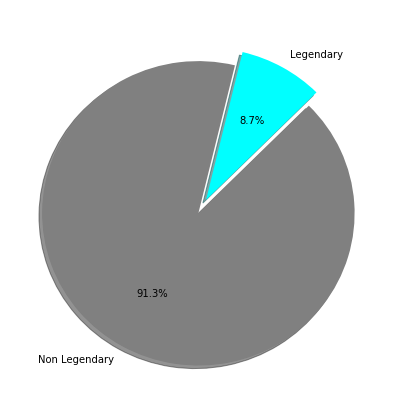

In [132]:
fig = plt.figure(figsize=(7,7))

colours = ["cyan", "gray"]
pokeLeg = pkmndf[pkmndf['is_legendary']==True]
pokeNon = pkmndf[pkmndf['is_legendary']==False]

legDist = [pokeLeg['name'].count(),pokeNon['name'].count()]
legPie = plt.pie(legDist,
                 labels= ['Legendary', 'Non Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45,
                 explode=(0, 0.1))